## WURAOLA IFEOLUWA'S NOTEBOOK

# DATA SCIENCE TECHNICAL ASSESSMENT FOR SHE CODE AFRICA MENTORING PROGRAM

Dataset = Amazon Top 50 Bestselling Books 2009 - 2019

Download the dataset from; https://github.com/she-code-africa/SCAMP-Cohort4-Technical-assessment/blob/master/intermediate/dataset.csv

Given the dataset and details visualize

1. The best selling books of the decade.
2. The percentage of fiction to non-fiction.
3. Trends over the years.
4. Top 10 Authors according to reviews.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from PIL import Image

import os, sys
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [2]:
#import the data
data = pd.read_csv('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/dataset.csv')

# Exploratory Data Analysis

In [3]:
#Number of rows and columns
data.shape

(550, 7)

In [4]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#check for missing/null values 
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
#statistics of the data
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# VISUALIZATIONS

# 1. The best selling books of the decade.

In [8]:
top_book = data['Name'].value_counts()

In [9]:
top_book

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Divergent / Insurgent                                                            1
Frozen (Little Golden Book)                                                      1
A Stolen Life: A Memoir                                                          1
I Am Confident, Brave & Beautiful: A Coloring Book for Girls                     1
What Should Danny Do? (The Power to Choose Series)                               1
Name: Name, Length: 351, dtype: int64

Text(0, 0.5, 'Name of books')

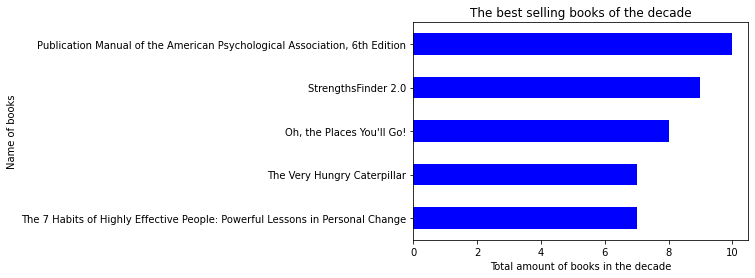

In [10]:
top_book.iloc[:5].plot(kind='barh', color=['blue'])
plt.title('The best selling books of the decade')
plt.gca().invert_yaxis()
plt.xlabel('Total amount of books in the decade')
plt.ylabel('Name of books')

# Result
## Out of all the books sold in the decade, I visualised the 5 best books to know the best selling books of the decade. 
From my analysis, it showed 'Publication Manual of the American Psychological Association, 6th Edition' to be the best selling book of the decade with a frequency of 10 books in total, followed by 'StrengthsFinder 2.0' with a frequency of 9 books in total, and 'Oh, the Places You'll Go!' with a frequency of 8 books in total, and lastly, the fourth and the fifth best selling are 'The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change' and 'The Very Hungry Caterpillar' both have a frequency of 7 books in total.

# 2. The percentage of fiction to non-fiction.

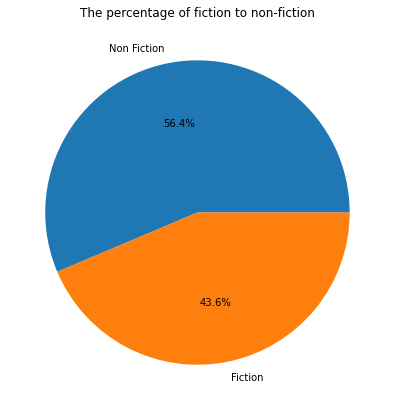

In [11]:
plt.figure(figsize = (15,7))
plt.pie(data['Genre'].value_counts(), labels = ['Non Fiction', 'Fiction'], autopct="%.1f%%")
plt.title('The percentage of fiction to non-fiction',color='black')
plt.show()

# Result
From my analysis, out of all the books sold over the decade, the percentage of fiction genre is is 43.6% while that of Non-fiction genre is 56.4%.
The results says the number of non-fiction genre books sold over the decade is more that than of the fiction genre books.

# 3. Trends over the years.

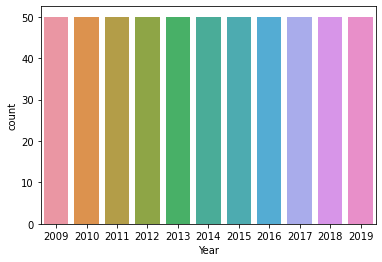

In [12]:
#variations over the year 
sns.countplot('Year', data=data)
plt.show()

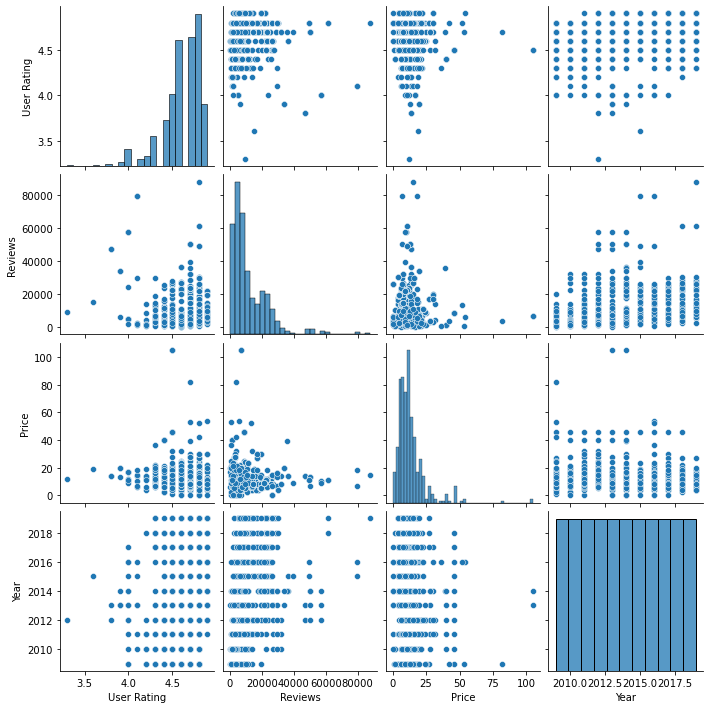

In [13]:
# visualing relationships among the variables
sns.pairplot(data)

# To understand insights on the trends over the decade and the pairplot above, I did the following visualizations;

1. Trend of user rating over the years
2. Trend of Price over the year
3. Trend of reviews over the decade
4. Trends of Book Genre(friction or non-fiction over the decade
5. Check correlation and plot heatmap of the data

<AxesSubplot:ylabel='User Rating'>

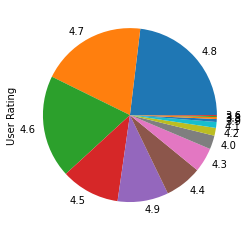

In [14]:
y = data["User Rating"].value_counts()
y.plot(kind = "pie")

Text(0, 0.5, 'Year')

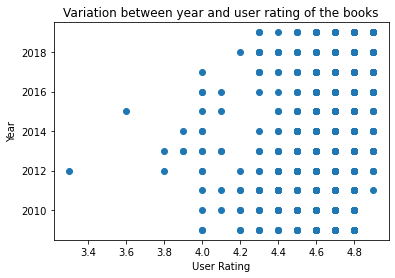

In [15]:
#Trends of user rating over the years

x = data["User Rating"]
y = data["Year"]

plt.scatter(x,y)
plt.title('Variation between year and user rating of the books')
plt.xlabel('User Rating')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

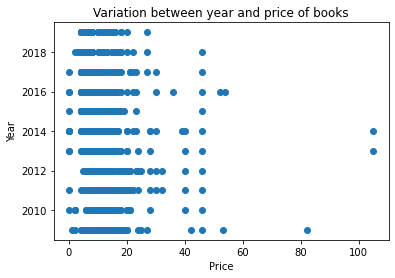

In [16]:
#Trend of Price over the year

x = data["Price"]
y = data["Year"]

plt.scatter(x,y)
plt.title('Variation between year and price of books')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0.5, 0, 'Year')

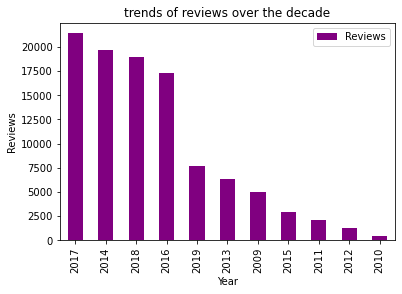

In [17]:
# Trends of reviews over the decade
data_year = data.drop_duplicates(subset=['Year'])

review_year = data_year[['Year','Reviews']].groupby('Year').sum().sort_values('Reviews', ascending=False)

review_year.plot(kind ='bar',color =['purple'])
plt.title('trends of reviews over the decade')
plt.ylabel('Reviews')
plt.xlabel('Year')

<AxesSubplot:xlabel='Year', ylabel='count'>

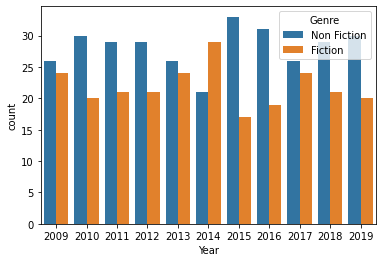

In [18]:
#Trends of Book Genre(friction or non-fiction over the decade
sns.countplot('Year', hue ='Genre', data = data)

In [19]:
#create dummies for genre
#For this case, we will be using the pandas method for one-hot encoding (we do not want priority) as shown in the code below.
data = pd.get_dummies(data, columns =['Genre'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               550 non-null    object 
 1   Author             550 non-null    object 
 2   User Rating        550 non-null    float64
 3   Reviews            550 non-null    int64  
 4   Price              550 non-null    int64  
 5   Year               550 non-null    int64  
 6   Genre_Fiction      550 non-null    uint8  
 7   Genre_Non Fiction  550 non-null    uint8  
dtypes: float64(1), int64(3), object(2), uint8(2)
memory usage: 27.0+ KB


In [21]:
#create dummies for year using one-hot encoding
data = pd.get_dummies(data, columns =['Year'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               550 non-null    object 
 1   Author             550 non-null    object 
 2   User Rating        550 non-null    float64
 3   Reviews            550 non-null    int64  
 4   Price              550 non-null    int64  
 5   Genre_Fiction      550 non-null    uint8  
 6   Genre_Non Fiction  550 non-null    uint8  
 7   Year_2009          550 non-null    uint8  
 8   Year_2010          550 non-null    uint8  
 9   Year_2011          550 non-null    uint8  
 10  Year_2012          550 non-null    uint8  
 11  Year_2013          550 non-null    uint8  
 12  Year_2014          550 non-null    uint8  
 13  Year_2015          550 non-null    uint8  
 14  Year_2016          550 non-null    uint8  
 15  Year_2017          550 non-null    uint8  
 16  Year_2018          550 non

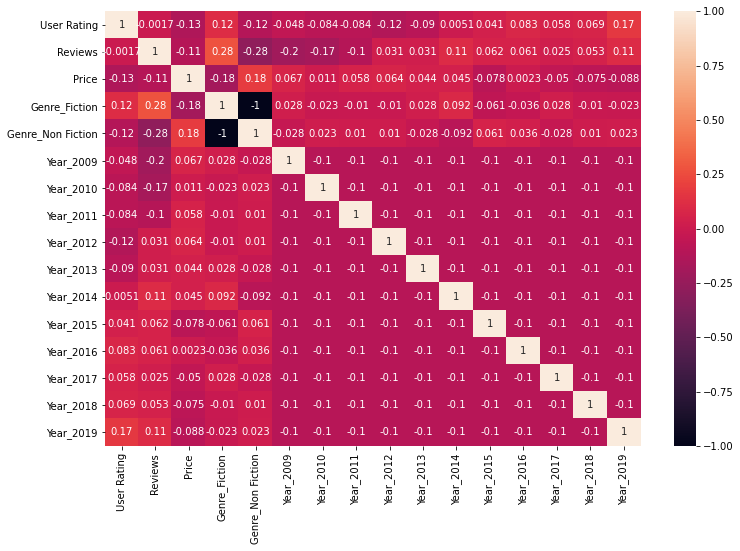

In [23]:
#check correlation and plot heatmap 
corr = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr,annot=True)
plt.show()

# Result
from the corroplot we denote the following;

1. User rating is positively correlated to year (2014, 2015, 2016, 2017, 2018, and 2019) and negatively correlated to year(2009, 2010, 2011, 2012, and 2013)

2. Reviews is positively correlated to year (2012, 2013, 2014, 2015, 2016, 2017, 2018, and 2019) and negatively correlated to year(2011, 2012, and 2013)

3. Price is positively correlated to year (2009, 2010, 2011, 2012, 2013, 2014  and 2016) and negatively correlated to year(2015, 2017, 2018, and 2019)

4. Genre_fiction is positively correlated to year (2009, 2013, 2014, and 2017) and negatively correlated to year(2010, 2011, 2012, 2015, 2016, 2018, and 2019)

5. Genre_Non_Fiction is positively correlated to year (2010, 2011, 2012, 2015, 2016, 2018, and 2019) and negatively correlated to year(2009, 2013, 2014, and 2017)


# 4. Top 10 Authors according to reviews.

Text(0, 0.5, 'Author Name')

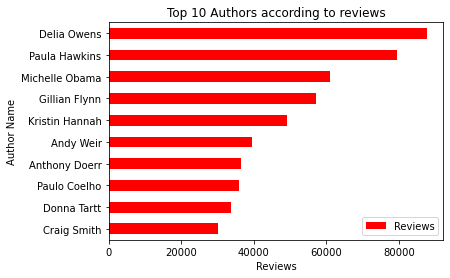

In [24]:
data_author = data.drop_duplicates(subset=['Author'])

#authors with the highest number of reviews
top_review_auth = data_author[['Author','Reviews']].groupby('Author').sum().sort_values('Reviews', ascending=False)

top_review_auth.iloc[:10].plot(kind='barh',color=['red'])

plt.title('Top 10 Authors according to reviews')
plt.gca().invert_yaxis()
plt.xlabel('Reviews')
plt.ylabel('Author Name')

# Result
From my analysis of the top 10 authors according to reviews, the results shows Delia Owens as the top author followed by Paula Hawkins and the least of the 10 
being Craig Smith